# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [144]:
import pandas as pd
import seaborn as sns
import operator
from IPython.display import display, Markdown, Latex

In [145]:
ecom = pd.read_csv('EcommercePurchases.csv')

**Check the head of the DataFrame.**

In [146]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [147]:
rows    = ecom.shape[0]
columns = ecom.shape[1]
display(Markdown('The number of **rows**: '), rows)
display(Markdown('The number of **columns**: '), columns)

The number of **rows**: 

10000

The number of **columns**: 

14

** What is the average Purchase Price? **

In [148]:
purchase_price = ecom['Purchase Price']
avg_purchase_price = purchase_price.mean()
display(Markdown('The **average** Purchase Price: '), avg_purchase_price)

The **average** Purchase Price: 

50.34730200000025

** What were the highest and lowest purchase prices? **

In [149]:
display(Markdown('The **highest** purchase price: '), purchase_price.max())

The **highest** purchase price: 

99.99

In [150]:
display(Markdown('The **lowest** purchase price: '), purchase_price.min())

The **lowest** purchase price: 

0.0

** How many people have English 'en' as their Language of choice on the website? **

In [151]:
eng_lang = ecom.loc[ecom['Language'] == 'en']
display(Markdown('The number of people have **English** as their language of choice on the website: '), len(eng_lang))

The number of people have **English** as their language of choice on the website: 

1098

** How many people have the job title of "Lawyer" ? **


In [152]:
lawyers = ecom.loc[ecom['Job'] == 'Lawyer']
display(Markdown('The number of  people have the job title of **"Lawyer"**: '), len(lawyers))

The number of  people have the job title of **"Lawyer"**: 

30

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [153]:
am_pm = ecom['AM or PM']
display(Markdown('The number of people made purchase during **AM**: '), len(ecom.loc[am_pm == "AM"]))
display(Markdown('The number of people made purchase during **PM**: '), len(ecom.loc[am_pm == "PM"]))

The number of people made purchase during **AM**: 

4932

The number of people made purchase during **PM**: 

5068

** What are the 5 most common Job Titles? **

In [154]:
sorted_jobs           = ecom.groupby(by='Job').size().sort_values(ascending=False)
five_most_common_jobs = sorted_jobs.head(5)
display(Markdown("The **5 most common** jobs: "), five_most_common_jobs)

The **5 most common** jobs: 

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Designer, jewellery                  27
Research officer, political party    27
dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [155]:
ninety_wt_trans = ecom.loc[ecom['Lot'] == "90 WT"]
display(Markdown('The **purchase price** for the **90 WT transaction**: '), ninety_wt_trans['Purchase Price'])

The **purchase price** for the **90 WT transaction**: 

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [156]:
person = ecom.loc[ecom['Credit Card'] == 4926535242672853]
display(Markdown("The **email** of the person with the following **Credit Card Number: 4926535242672853**: "), person['Email'])

The **email** of the person with the following **Credit Card Number: 4926535242672853**: 

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [157]:
american_express_cc_provider    = ecom.loc[ecom['CC Provider'] == "American Express"]
ae_cc_provider_purchase_over_95 = american_express_cc_provider.loc[ecom['Purchase Price'] > 95]
display(Markdown('People have **American Express** as their **Credit Card Provider** and made **a purchase above $95**: '), len(ae_cc_provider_purchase_over_95))

People have **American Express** as their **Credit Card Provider** and made **a purchase above $95**: 

39

** Hard: How many people have a credit card that expires in 2025? **

In [158]:
def is_expired_in_year(year_str, cc_exp_date):
    if year_str in cc_exp_date:
        return True
    else:
        return False


exp_dates             = ecom['CC Exp Date']
cards_expired_in_2025 = []


for date in exp_dates:
    if is_expired_in_year("25", date):
        cards_expired_in_2025.append(date)

display(Markdown("People have a **credit card** that **expires in 2025**: "), len(cards_expired_in_2025))

People have a **credit card** that **expires in 2025**: 

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [159]:
def extract_company_email(email):
    return email[email.index('@') + len('@'):]

def get_email_cc_providers(emails):
    hash = dict()
    for email in emails:
        extracted_email_cc_provider = extract_company_email(email)
        if extracted_email_cc_provider in hash:
            hash[extracted_email_cc_provider] += 1
        else:
            hash[extracted_email_cc_provider] = 0
    return hash

def display_top_popular_email_cc_providers(popular_email_cc_providers):
    display(Markdown("The **top 5** most popular **email providers/hosts**: "))
    for email in popular_email_cc_providers:
        display(Markdown(f"**{email}**"))
    

emails = ecom['Email']
email_cc_providers_with_sequences          = get_email_cc_providers(emails)
sorted_email_cc_providers_with_sequences   = sorted(email_cc_providers_with_sequences.items(), key=operator.itemgetter(1), reverse=True)
top_5_email_cc_with_sequences              = sorted_email_cc_providers_with_sequences[:5]
top_5_email_cc_providers                   = [email[0] for email in top_5_email_cc_with_sequences]
display_top_popular_email_cc_providers(top_5_email_cc_providers)

The **top 5** most popular **email providers/hosts**: 

**hotmail.com**

**yahoo.com**

**gmail.com**

**smith.com**

**williams.com**

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

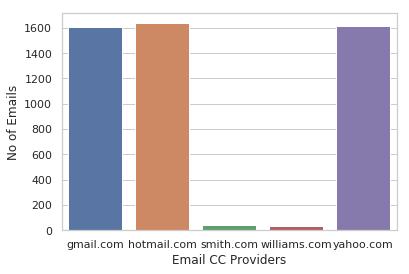

In [179]:
df = pd.DataFrame(top_5_email_cc_with_sequences, columns=['Email CC Providers', 'No of Emails'])

for col in ['Email CC Providers']:
    df[col] = df[col].astype('category')

sns.barplot(x="Email CC Providers",y="No of Emails", data=df)

** Plot distribution of Purchase Price **

/home/tiendo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


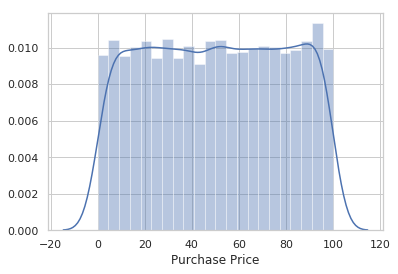

In [182]:
sns.distplot(ecom['Purchase Price'])

** Implement countplot on Language **

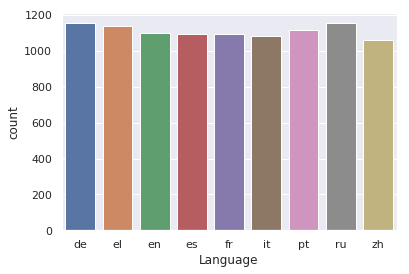

In [208]:
sns.countplot(x="Language", data=ecom)

In [ ]:
Feel free to plot more graphs to dive deeper into the dataset.

# Great Job!